Load the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import dataset

In [2]:
df=pd.read_csv('datasets_20710_26737_Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


Check their shapes

In [3]:
print('th train data has {} rows and {} features'.format(df.shape[0],df.shape[1]))

th train data has 13320 rows and 9 features


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


Divide the data into numerical and categorical data and their descriptive statistics

In [5]:
num_features=df.select_dtypes(include=['int64','float64'])
categorical_features=df.select_dtypes(include='object')

In [6]:
num_features.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
categorical_features.describe()

,area_type,availability,location,size,society,total_sqft
count,13320,13320,13319,13304,7818,13320
unique,4,81,1305,31,2688,2117
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,8790,10581,540,5199,80,843


Number of missing values

In [8]:
df.isnull().sum().sort_values(ascending = False)[:34]

society         5502
balcony          609
bath              73
size              16
location           1
price              0
total_sqft         0
availability       0
area_type          0
dtype: int64

In [9]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

Cleaning the missing values

In [10]:
df.dropna(inplace = True)
df = df.drop(['area_type', 'availability', 'location', 'size', 'society'], axis = 1)
df.columns

Index(['total_sqft', 'bath', 'balcony', 'price'], dtype='object')

create a new class "other"

In [11]:
features=['total_sqft', 'bath', 'balcony', 'price']

In [12]:
for name in features:
    df[name].fillna('Other', inplace = True)

In [13]:
df[features].isnull().sum()

total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [14]:
object_features = df.select_dtypes(include='object').columns
object_features

Index(['total_sqft'], dtype='object')

In [15]:
def dummies(d):
    dummies_df=pd.DataFrame()
    object_features = d.select_dtypes(include='object').columns
    for name in object_features:
        dummies = pd.get_dummies(d[name], drop_first=False)
        dummies = dummies.add_prefix("{}_".format(name))
        dummies_df=pd.concat([dummies_df,dummies],axis=1)
    return dummies_df

In [16]:
dummies_data=dummies(df)
dummies_data.shape


(7496, 1682)

In [17]:
data=df.drop(columns=object_features,axis=1)
data.columns

Index(['bath', 'balcony', 'price'], dtype='object')

In [18]:
final_data=pd.concat([data,dummies_data],axis=1)
final_data.shape

(7496, 1685)

Re-spliting the data into train and test datasets

In [19]:
#
train_data=final_data.iloc[:3748,:]
test_data=final_data.iloc[3748:,:]
print(train_data.shape)
test_data.shape

(3748, 1685)


(3748, 1685)

Scaling and train test split

In [21]:
# X: independent variables and y: target variable
X = train_data
y = train_data.loc[:,'price']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Creating Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(8,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

W0708 10:09:38.539717 140096826877760 deprecation.py:506] From /home/chi/anaconda3/envs/tfkerEnv/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Training the Model

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128, epochs=50, callbacks=[early_stop])

Train on 2623 samples, validate on 1125 samples
Epoch 1/50
2623/2623 [==============================] - 2s 936us/sample - loss: 20794.6644 - val_loss: 18009.2410
Epoch 2/50
2623/2623 [==============================] - 0s 154us/sample - loss: 20772.7151 - val_loss: 17981.3403
Epoch 3/50
2623/2623 [==============================] - 0s 190us/sample - loss: 20742.0717 - val_loss: 17943.7337
Epoch 4/50
2623/2623 [==============================] - 0s 167us/sample - loss: 20699.6517 - val_loss: 17895.7760
Epoch 5/50
2623/2623 [==============================] - 0s 146us/sample - loss: 20646.3372 - val_loss: 17831.6006
Epoch 6/50
2623/2623 [==============================] - 0s 156us/sample - loss: 20555.4085 - val_loss: 17745.9312
Epoch 7/50
2623/2623 [==============================] - 0s 140us/sample - loss: 20462.1633 - val_loss: 17637.1670
Epoch 8/50
2623/2623 [==============================] - 1s 191us/sample - loss: 20363.0905 - val_loss: 17509.3009
Epoch 9/50
2623/2623 [==================

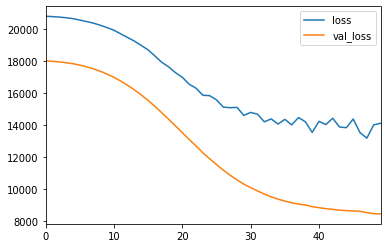

In [28]:
losses = pd.DataFrame(model.history.history)
losses.plot()

Evaluation

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [31]:
predictions = model.predict(X_test)
mean_absolute_error(y_test, predictions)


44.89622917561849

In [32]:
np.sqrt(mean_squared_error(y_test, predictions))

91.99400942638273